# Load the dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                   

df = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/Evaluate-Improve-Models/master/house_prices.csv')
df.sample(5)

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),...,Garage Qual_Po,Garage Qual_TA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Pool QC_Ex,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,SalesPrice
1212,80,85.00000,9350,5,8,1965,1999,0.0,633.0,0.0,586.0,1219.0,1265,0,0,1265,0.0,1.0,2,0,3,1,6,1,1965.0,2.0,502.0,0,92,0,96,0,0,0,10,2008,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,179900
140,20,69.22459,8050,5,5,1959,1959,150.0,856.0,162.0,125.0,1143.0,1143,0,0,1143,1.0,0.0,1,0,3,1,6,0,1959.0,1.0,308.0,0,0,0,0,0,0,0,5,2010,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,136000
2118,20,155.00000,20064,8,6,1976,1976,0.0,51.0,915.0,0.0,966.0,1743,0,0,1743,2.0,0.0,0,1,0,1,5,2,1976.0,2.0,529.0,646,0,0,0,0,0,0,5,2007,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,279000
4,60,74.00000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,189900
831,60,79.00000,11646,6,5,2005,2006,0.0,0.0,0.0,704.0,704.0,704,718,0,1422,0.0,0.0,2,1,3,1,7,1,2005.0,2.0,440.0,36,28,0,0,0,0,0,7,2009,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,173000


# "Garage Area" and "SalesPrice" features are selected to analyze.

In [0]:
new_df = df[['Garage Area','SalesPrice']]
new_df.head()

,Garage Area,SalesPrice
0,528.0,215000
1,730.0,105000
2,312.0,172000
3,522.0,244000
4,482.0,189900


## Convert the data into numpy arrays of two variables, X and y.

In [0]:
X = np.array(new_df[['Garage Area']])
y = np.array(new_df[['SalesPrice']])
print(X.shape) # Vewing the shape of X
print(y.shape) # Vewing the shape of y

(2930, 1)
(2930, 1)


## Split train and test data with 0.2 ratio.

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


# Linear Regression
Train a linear regression.

In [0]:
from sklearn import linear_model 

regressor = linear_model.LinearRegression()
regressor.fit(X_train,y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Calculate train and test R2.

In [0]:
from sklearn.metrics import r2_score

y_pred1 = regressor.predict(X_train)
print("Train:", r2_score(y_train,y_pred1))

y_pred2= regressor.predict(X_test)
print("Test:", r2_score(y_test,y_pred2))

Train: 0.41662810031808206
Test: 0.3870941766375502


## Print the bias and the slope.

In [0]:
print('Regressor coeffient or slope:',regressor.coef_[0][0])
print('Interception point with axis:',regressor.intercept_[0])

Regressor coeffient or slope: 239.27861052211557
Interception point with axis: 67676.77511042563


## Plot the test set with scatter plot and add the linear regression model line.
Remember linear regression recitation.

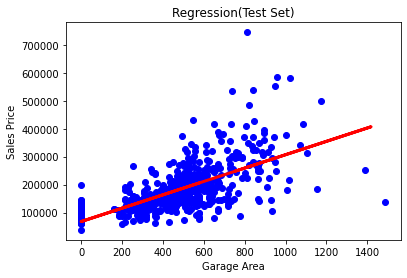

In [0]:
# Plot a graph with X_test vs y_test
plt.scatter(X_test,y_test,color="blue")
# Regressior line showing

plt.plot(X_train,y_pred1,color="red",linewidth=3)
plt.title('Regression(Test Set)')
plt.xlabel('Garage Area')
plt.ylabel('Sales Price')
plt.show()

# Multiple Linear Regression
Select all features.

In [0]:
df_all = df.drop('SalesPrice',1)


X = df_all
y = df['SalesPrice']
print(X.shape) # Vewing the shape of X
print(y.shape) # Vewing the shape of y

(2930, 304)
(2930,)


## Rescale the input features. Use MinMaxScaler.

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=(scaler.fit_transform(X))
print(X)


[[0.         0.4109589  0.14241978 ... 0.         1.         0.        ]
 [0.         0.20205479 0.04824604 ... 0.         1.         0.        ]
 [0.         0.20547945 0.06060904 ... 0.         1.         0.        ]
 ...
 [0.38235294 0.14041096 0.04272593 ... 0.         1.         0.        ]
 [0.         0.19178082 0.0407114  ... 0.         1.         0.        ]
 [0.23529412 0.18150685 0.03892122 ... 0.         1.         0.        ]]


## Train test split.

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## Fit regression model.

In [0]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Calculate train and test R2.

In [0]:
y_pred1 = regressor.predict(X_train)
print("Train:", r2_score(y_train,y_pred1))

y_pred2= regressor.predict(X_test)
print("Test:", r2_score(y_test,y_pred2))

Train: 0.9421612915913581
Test: -4.54480060897034e+17


## Print the regression coefficients.

In [0]:
print('Regressor coeffients for multiple linear regression:',regressor.coef_)

Regressor coeffients for multiple linear regression: [-7.93797761e+03  2.19039619e+04  1.82843630e+05  6.36421656e+04
  4.60641221e+04  4.88109571e+04  4.06403642e+03  4.57031897e+04
 -2.96988182e+15 -8.02983639e+14 -1.22920693e+15  3.21509177e+15
  1.10124049e+16  4.77643693e+15  2.46107937e+15 -1.22776403e+16
  4.52401930e+03 -1.99391896e+03  8.42754045e+03  2.56258023e+03
 -3.84376119e+04 -3.81583895e+04  1.29436147e+04  2.26909193e+04
  1.35260816e+04  2.19765129e+04  1.72647263e+04  1.10207895e+04
  2.48196465e+03  1.32984220e+04  2.86429061e+03  2.24390424e+04
 -3.42219489e+05  3.77749609e+03 -2.89125000e+03 -2.89800000e+03
  7.01648059e+15  7.01648059e+15  7.01648059e+15  7.01648059e+15
  7.01648059e+15  7.01648059e+15  7.01648059e+15 -1.81029565e+14
 -1.81029565e+14  2.40025000e+03 -1.59900000e+03  1.22559154e+15
  1.22559154e+15  1.22559154e+15  1.22559154e+15 -5.36266304e+15
 -5.36266304e+15 -5.36266304e+15 -5.36266304e+15  8.62984434e+14
  1.60245820e+15  8.62984434e+14 -2.6

# Ridge Regression
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

## Use cross-validation to estimate alpha. Set the fold size to 5.

In [0]:
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV
kfold = KFold(n_splits=5)

alphas=[1e-3, 1e-2, 1e-1, 1, 2, 5, 8, 10]
# Create and fit model
model_rcv = RidgeCV(alphas,cv=kfold,normalize =True)
# code comes here
model_rcv.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 2.e+00, 5.e+00, 8.e+00, 1.e+01]),
        cv=KFold(n_splits=5, random_state=None, shuffle=False),
        fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

## Calculate the train and test R2.

In [0]:
y_pred3 = model_rcv.predict(X_train)
print("Train:", r2_score(y_train,y_pred3))

y_pred4= model_rcv.predict(X_test)
print("Test:", r2_score(y_test,y_pred4))

Train: 0.9371960844021472
Test: 0.82085128425282


## Print the best alpha.

In [0]:
print("Alpha:", model_rcv.alpha_)

Alpha: 0.1


## Print the regression coefficients.

In [0]:
print('Regressor coeffients for ridge regression:',model_rcv.coef_)

Regressor coeffients for ridge regression: [-8.06367052e+03  1.54708368e+04  1.39996036e+05  5.63196263e+04
  3.49897248e+04  2.11241640e+04  5.23583895e+03  4.67141609e+04
  8.08075245e+04  1.48537915e+04  5.52374671e+02  1.04283527e+05
  9.61515316e+04  3.38839723e+04 -1.13049796e+04  1.28770356e+05
  8.38700173e+03 -3.77295907e+03  1.89283299e+04  7.56899080e+03
 -1.98540252e+04 -3.17876968e+04  2.58405855e+04  1.87821101e+04
  1.66531862e+04  2.18153812e+04  2.13154902e+04  1.71283792e+04
  7.37052601e+03  6.01436240e+03  5.69548982e+03  2.40614384e+04
 -1.28280988e+04  5.50049966e+03 -3.12957408e+03 -2.47105450e+03
 -3.24359661e+03 -8.29825445e+03  3.59083253e+03  7.92463357e+03
  5.08366786e+03  2.30799566e+03 -4.00062742e+03 -7.40938795e+03
  7.40938795e+03  1.80152415e+02  4.71773042e+02 -3.65417295e+02
  4.43249449e+03 -7.84131959e+03  9.16958814e+01 -6.58373179e+02
  3.00631962e+03 -8.19302767e+03  7.29623085e+02  1.02931154e+04
  0.00000000e+00 -1.02931154e+04 -1.05226046e+0

Alper Bingol / 23661
